In [1]:
#importing pandas
import pandas as pd

In [2]:
#reading data.csv
urls_data = pd.read_csv("data.csv")

In [3]:
#displaying head values
urls_data.head()

,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad


In [4]:
#function to tokanize the data
def makeTokens(f):
    tkns_BySlash = str(f.encode('utf-8')).split('/') # make tokens after splitting by slash
    total_Tokens = []
    for i in tkns_BySlash:
        tokens = str(i).split('-') # make tokens after splitting by dash
        tkns_ByDot = []
        for j in range(0,len(tokens)):
            temp_Tokens = str(tokens[j]).split('.') # make tokens after splitting by dot
            tkns_ByDot = tkns_ByDot + temp_Tokens
        total_Tokens = total_Tokens + tokens + tkns_ByDot
    total_Tokens = list(set(total_Tokens))  #remove redundant tokens
    if 'com' in total_Tokens:
        total_Tokens.remove('com') # removing .com since it occurs a lot of times and it should not be included in our features
    return total_Tokens

In [5]:
#seprating url and label
url_list = urls_data["url"]
y = urls_data["label"]

In [6]:
#importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
vectorizer = TfidfVectorizer(tokenizer=makeTokens)

In [8]:
#fiting the vectorizer
X = vectorizer.fit_transform(url_list)

In [9]:
#performing test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
logit = LogisticRegression(max_iter=1000)

In [11]:
#training the model using logestic regression
logit.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [12]:
#printing its accuracy
print("Accuracy ",logit.score(X_test, y_test))

Accuracy  0.96161392743748


In [13]:
#test data
X_predict = ["https://www.section.io/engineering-education/",
"https://www.youtube.com/",
"https://www.traversymedia.com/", 
"https://www.kleinehundezuhause.com", 
"http://ttps://www.mecymiafinance.com",
"https://www.atlanticoceanicoilandgas.com"]

In [14]:
X_predict = vectorizer.transform(X_predict)
New_predict = logit.predict(X_predict)

In [15]:
#printing predicted values
print(New_predict)

['good' 'good' 'bad' 'bad' 'bad' 'bad']


In [16]:
#importing libraries for visualization
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

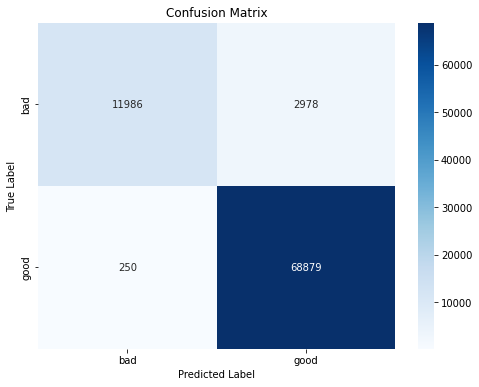

In [17]:
#predict on the test set
y_pred = logit.predict(X_test)

#compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

#plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=logit.classes_, yticklabels=logit.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [18]:
#convert categorical labels to binary (0 or 1)
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)

#get predicted probabilities for the positive class (label = 1)
y_probs = logit.predict_proba(X_test)[:, 1]

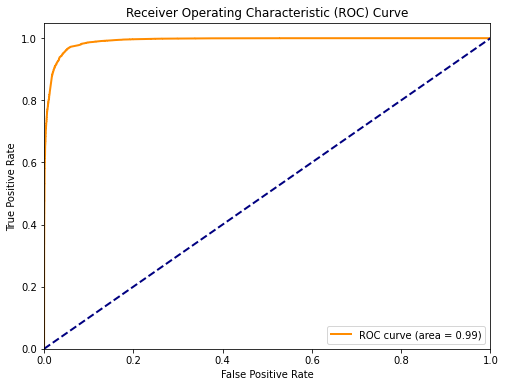

In [19]:
#compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_probs)
roc_auc = auc(fpr, tpr)

#plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [20]:
#saving vectorizer and model
import joblib
joblib.dump(vectorizer, '_vectorizer.pkl')
joblib.dump(logit, '_trainedModel.pkl')

['_trainedModel.pkl']

In [21]:
#importing saved model
loaded_model = joblib.load('_trainedModel.pkl')

In [22]:
#prediction using loaded model
New_predict = loaded_model.predict(X_predict)

In [23]:
print(New_predict)

['good' 'good' 'bad' 'bad' 'bad' 'bad']
